<a href="https://colab.research.google.com/github/rashmigpai/IntroToBigData/blob/main/Final_Project_Rashmi_Pai_Regression_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Presentation
---
### Specification: Regression
### Cluster Analysis

In [1]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 71kB/s 
     |████████████████████████████████| 204kB 38.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=9205e302e3853e0ca3b59c1a4d62dbfed01c785f7ee9d6199e8f4e7f738455a6
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [2]:
!apt-get update 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [3]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark
import findspark
findspark.init()

### STEP 1 Correlation and Regression Analysis:
---
Amongst the quantitative variables identify Relationships

In [25]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *

spark = SparkSession \
.builder \
.master("local") \
.appName("Pima Diabetes") \
.config("spark.sql.shuffle.partitions","1") \
.getOrCreate()

In [26]:
schema = StructType([StructField('Pregnancies',IntegerType(),True),
                         StructField('Glucose',IntegerType(),True),
                         StructField('BloodPressure',IntegerType(),True),
                         StructField('SkinThickness',IntegerType(),True),
                         StructField('Insulin',IntegerType(),True),
                         StructField('BMI',DoubleType(),True),
                         StructField('DiabetesPedigreeFunction',DoubleType(),True),
                         StructField('Age',IntegerType(),True),
                         StructField('Outcome',IntegerType(),True)])

In [27]:
df = spark.read.csv(path='diabetes.csv', schema=schema).cache()
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

plt.style.use('fivethirtyeight')

**a)Identify two or more quantitative variables that might be correlated**

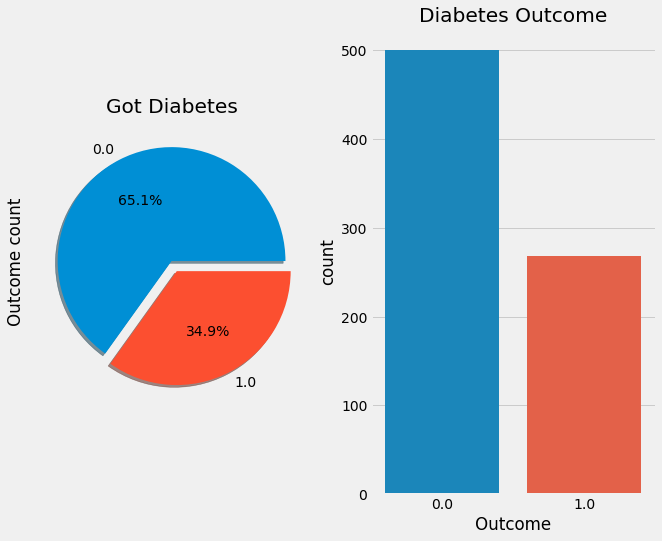

In [13]:
f,ax=plt.subplots(1,2,figsize=(10,8))
df.select('Outcome').toPandas()['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Got Diabetes')
ax[0].set_ylabel('Outcome count')
sns.countplot('Outcome',data=df.toPandas(),ax=ax[1])
ax[1].set_title('Diabetes Outcome')
plt.show()

**b) Find the correlation coefficient.**

In [29]:
from pyspark.ml.stat import Correlation
columns = df.columns
columns.remove("Outcome")
[(f'{column}<->Outcome', df.stat.corr(column,"Outcome")) for column in columns]

[('Pregnancies<->Outcome', 0.22271884490874658),
 ('Glucose<->Outcome', 0.46570492715672124),
 ('BloodPressure<->Outcome', 0.0678847333615994),
 ('SkinThickness<->Outcome', 0.07587037935954091),
 ('Insulin<->Outcome', 0.13112098923052046),
 ('BMI<->Outcome', 0.2933292749102952),
 ('DiabetesPedigreeFunction<->Outcome', 0.174908995370013),
 ('Age<->Outcome', 0.23972110122521173)]

**c)Create the scatter diagram under graphs.**

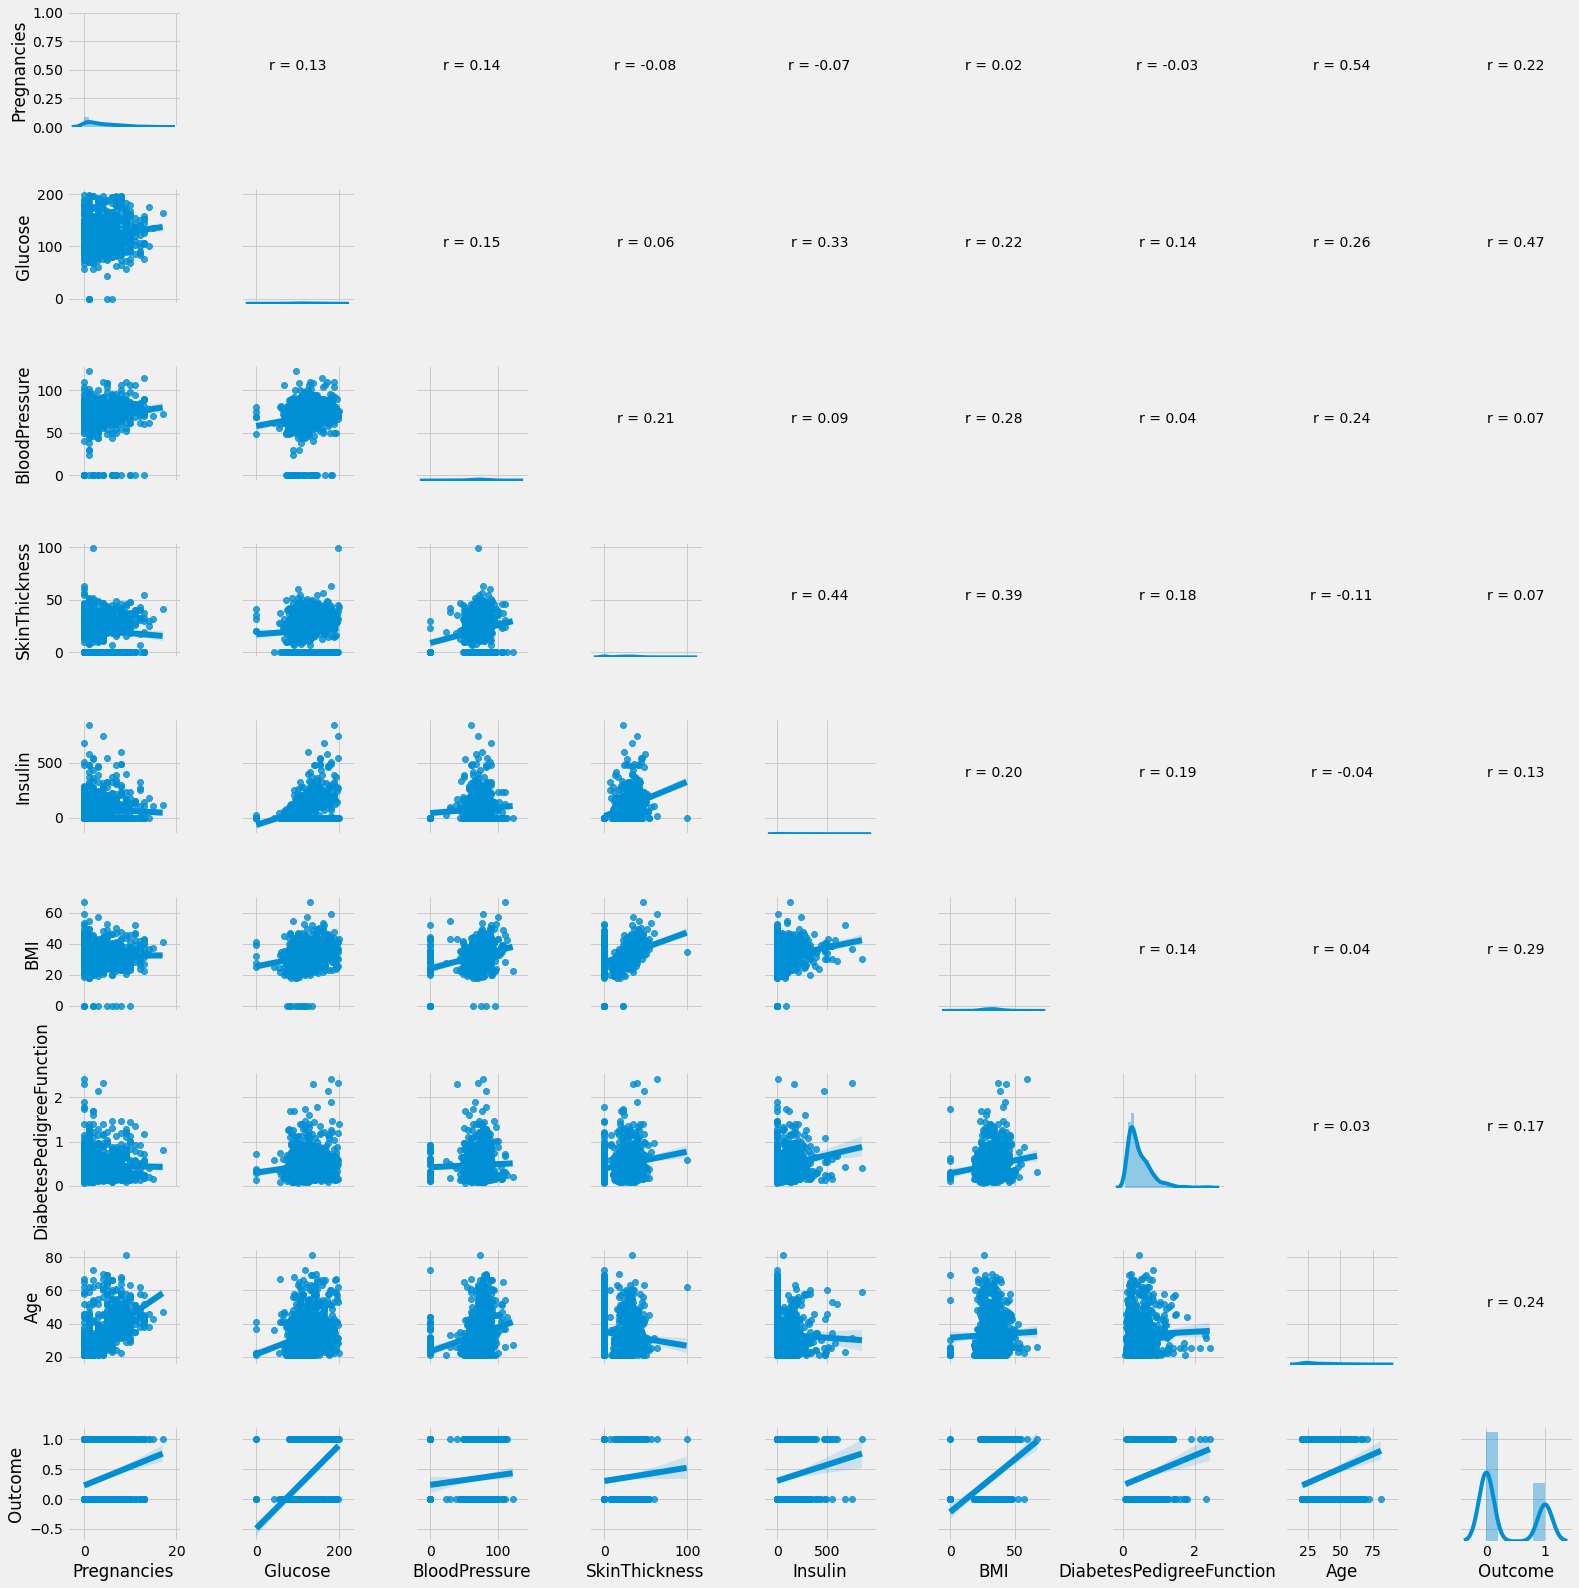

In [24]:
df=df.na.drop()
df.count()
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(df.toPandas())
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

**d)Provide your rationale and justify your findings regarding the correlation between two quantitative variables of interest.**

In [15]:
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col
(df.describe().select(
                    "summary",
                    F.round("Pregnancies", 4).alias("Pregnancies"),
                    F.round("Glucose", 4).alias("Glucose"),
                    F.round("BMI", 4).alias("BMI"),
                    F.round("Age", 4).alias("Age"),
                    F.round("Insulin", 4).alias("Insulin"),
                    F.round("DiabetesPedigreeFunction", 4)\
                    .alias("DiabetesPedigreeFunction"),
                    F.round("SkinThickness", 4).alias("SkinThickness"),
                    F.round("BloodPressure", 4).alias("BloodPressure"),
                    F.round("Outcome", 4).alias("Outcome"))
                    .show())

+-------+-----------+--------+-------+-------+-------+------------------------+-------------+-------------+-------+
|summary|Pregnancies| Glucose|    BMI|    Age|Insulin|DiabetesPedigreeFunction|SkinThickness|BloodPressure|Outcome|
+-------+-----------+--------+-------+-------+-------+------------------------+-------------+-------------+-------+
|  count|      768.0|   768.0|  768.0|  768.0|  768.0|                   768.0|        768.0|        768.0|  768.0|
|   mean|     3.8451|120.8945|31.9926|33.2409|79.7995|                  0.4719|      20.5365|      69.1055|  0.349|
| stddev|     3.3696| 31.9726| 7.8842|11.7602|115.244|                  0.3313|      15.9522|      19.3558|  0.477|
|    min|        0.0|     0.0|    0.0|   21.0|    0.0|                   0.078|          0.0|          0.0|    0.0|
|    max|       17.0|   199.0|   67.1|   81.0|  846.0|                    2.42|         99.0|        122.0|    1.0|
+-------+-----------+--------+-------+-------+-------+------------------

As we can see from the above table, Outcome is clearly an categorical variable. Rest of the columns are good candidates for quantitative columns.

### STEP 2 Regression Set up:
---
Work on your project data to start preliminary analysis. Prepare data by using the following preprocessing transformation and tasks if required:

a)Please standardize the data.

b)Check for null values.

c)Check for outliers.

d)Conduct Feature selection or Feature Engineering.

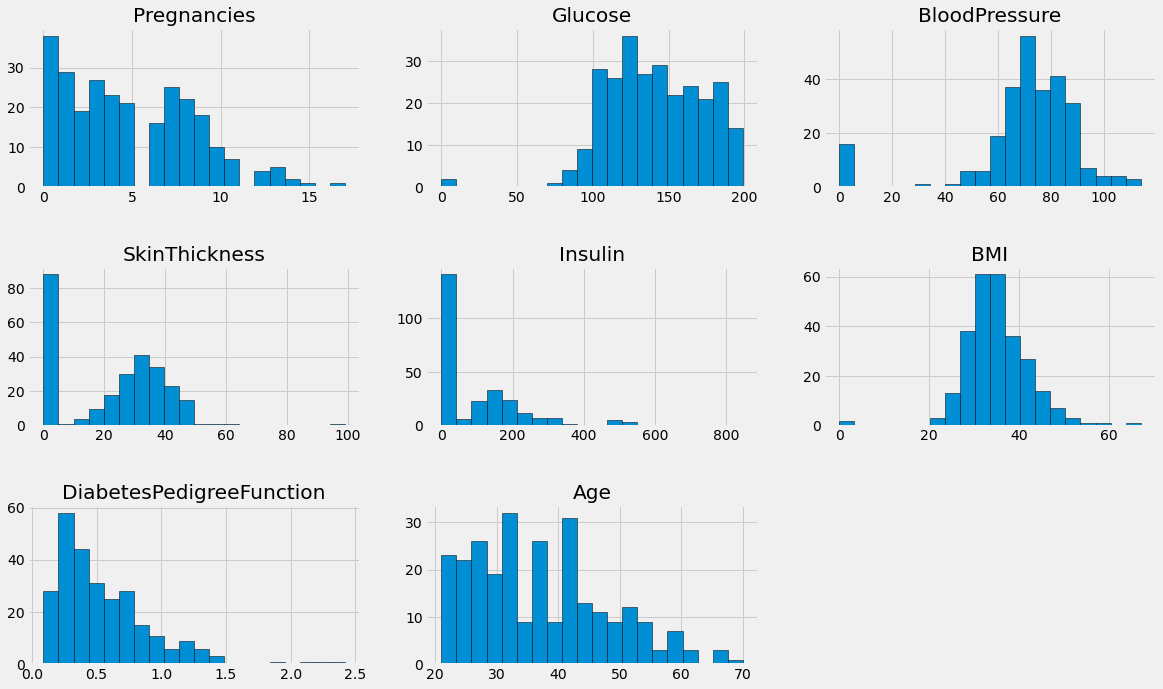

In [30]:
import itertools
padf=df.toPandas()
dia_df=padf[padf['Outcome']==1]
columns=padf.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dia_df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

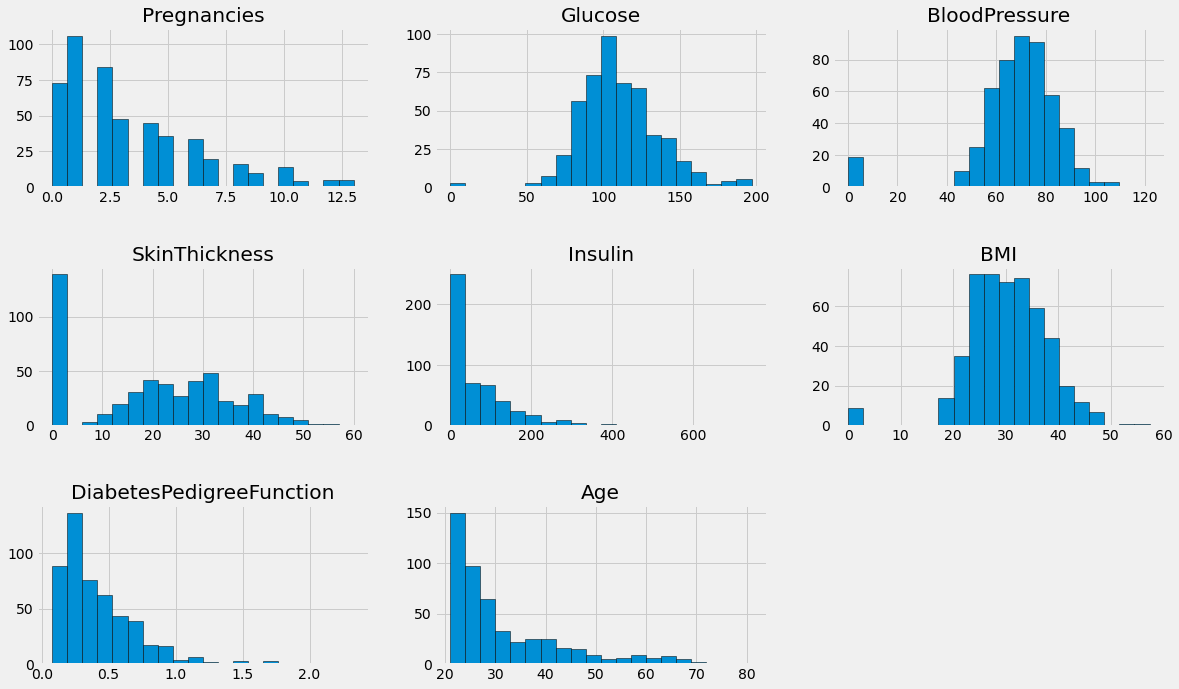

In [31]:
dia_df=padf[padf['Outcome']==0]
columns=padf.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dia_df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

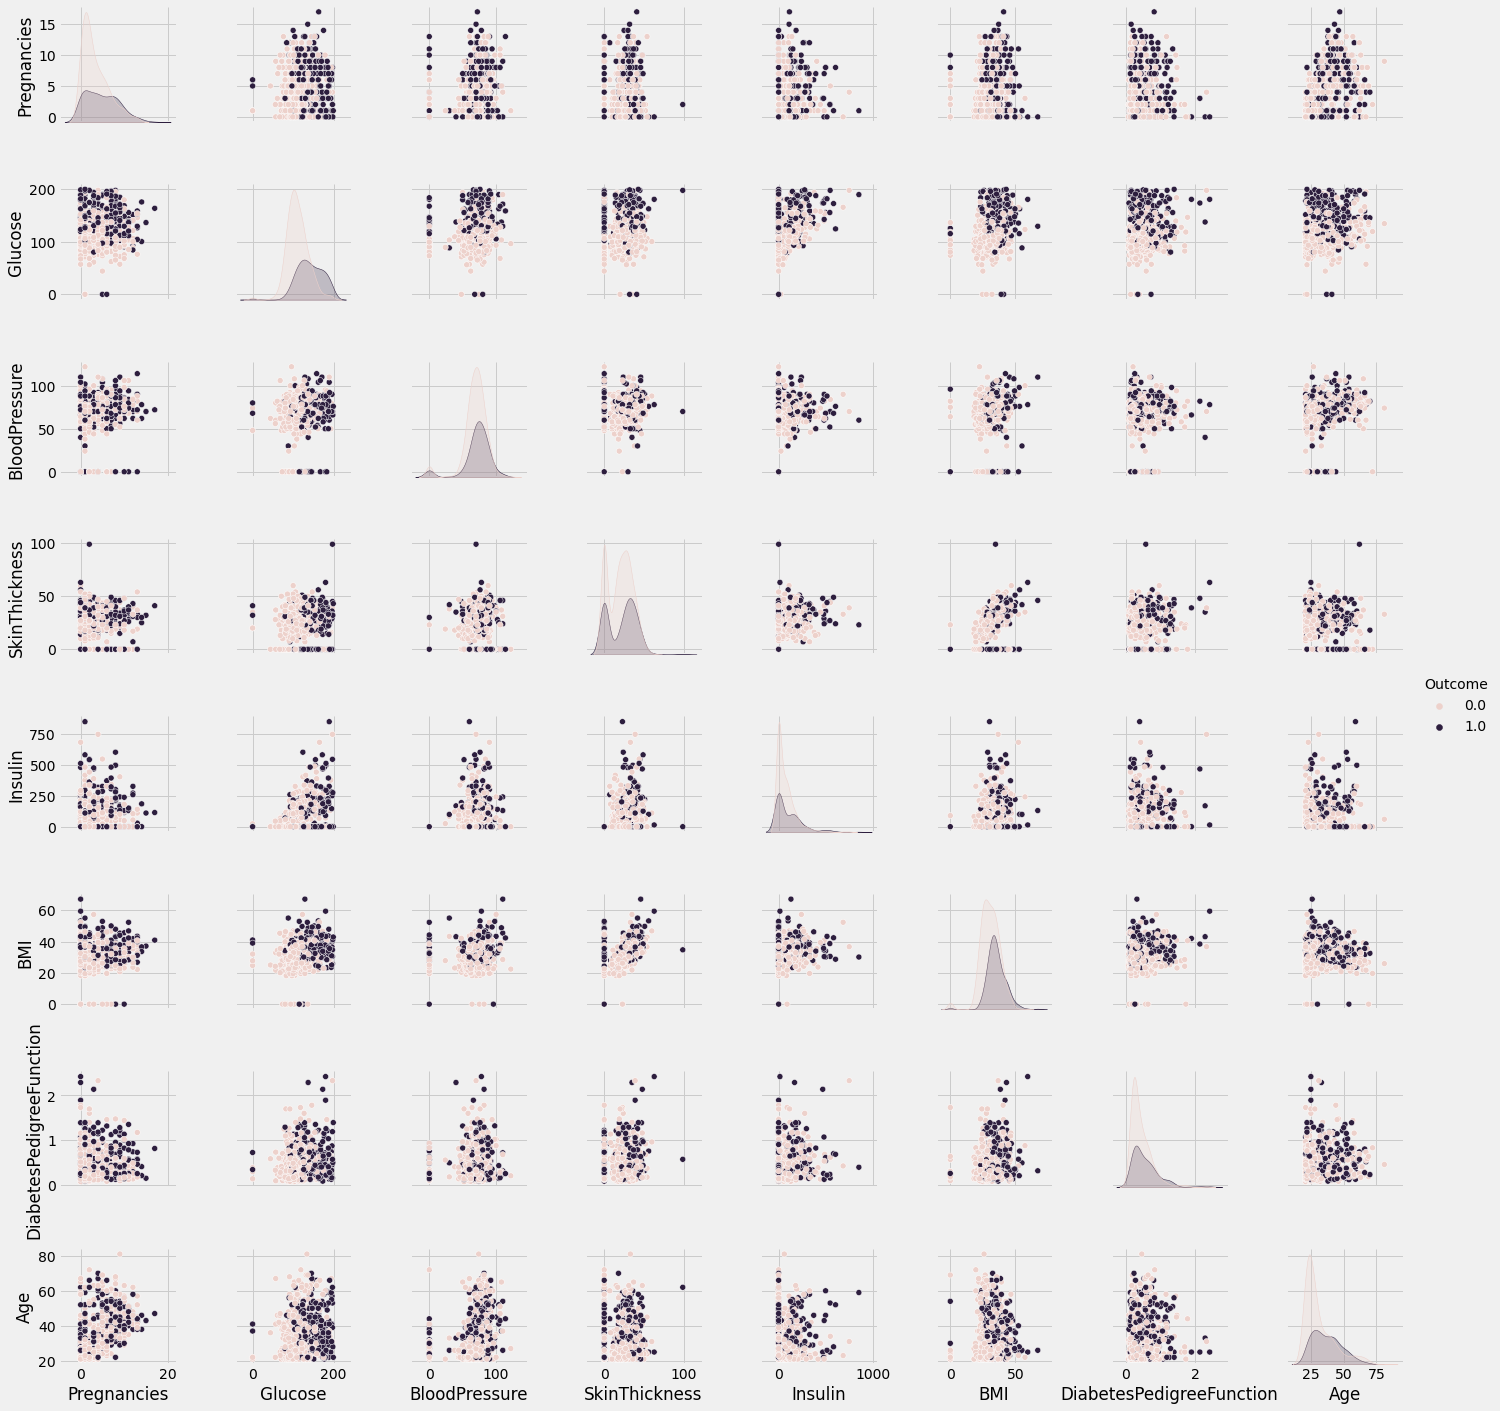

In [32]:
sns.pairplot(data=padf,hue='Outcome',diag_kind='kde')
plt.show()

In [39]:
df=df.na.drop("any")
df.createOrReplaceTempView("DATA")
for column in df.columns:
  print(f"printing rows where {column} is null")
  spark.sql(f"SELECT * FROM DATA where {column} IS NULL").show()

printing rows where Pregnancies is null
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+

printing rows where Glucose is null
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+

printing rows where BloodPressure is null
+-----------+-------+-------------+-------------+-------+---+------------------------+--

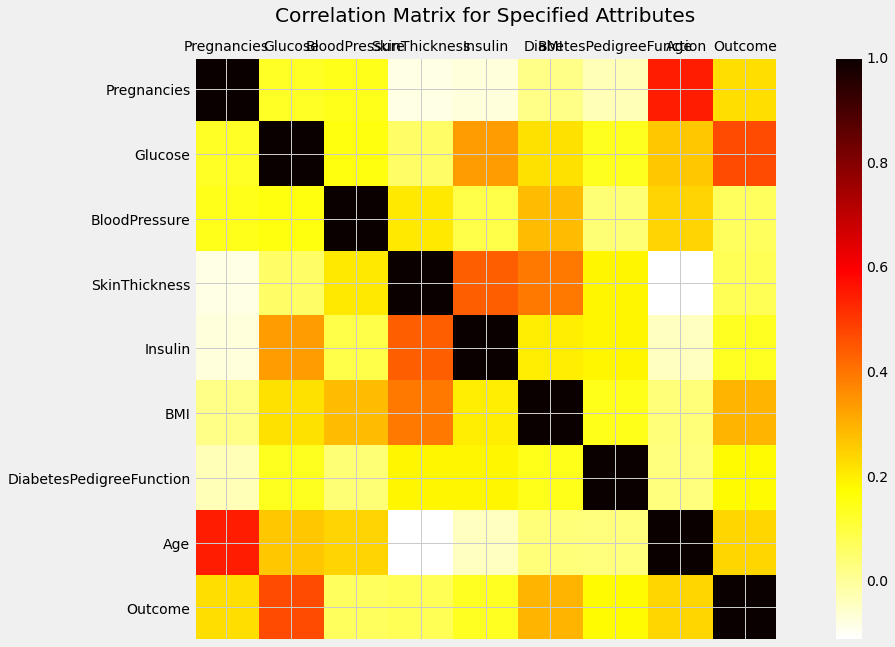

In [40]:
import matplotlib.pyplot as plt
import matplotlib
def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(figsize=(18,10))
    ax=fig.add_subplot(1,1,1)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,cmap=matplotlib.cm.hot_r)
    fig.colorbar(cax)
    plt.rcParams.update({'font.size': 10})
    plt.show()

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.mllib.stat import Statistics
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(df).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
plot_corr_matrix(corrmatrix, df.columns, 200)

**Rational/Findings**

Glucose, BMI, Insulin, SkinThickness and Age seem to have high correlation

There are some 0 Glucose, Insulin and Blood Pressure values, which don't make sense.

In [125]:
bounds = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
for column in df.columns:
  print(column, bounds[column])

Pregnancies {'q1': 1.0, 'q3': 6.0, 'lower': -6.5, 'upper': 13.5}
Glucose {'q1': 99.0, 'q3': 140.0, 'lower': 37.5, 'upper': 201.5}
BloodPressure {'q1': 62.0, 'q3': 80.0, 'lower': 35.0, 'upper': 107.0}
SkinThickness {'q1': 0.0, 'q3': 32.0, 'lower': -48.0, 'upper': 80.0}
Insulin {'q1': 0.0, 'q3': 127.0, 'lower': -190.5, 'upper': 317.5}
BMI {'q1': 27.3, 'q3': 36.6, 'lower': 13.35, 'upper': 50.550000000000004}
DiabetesPedigreeFunction {'q1': 0.243, 'q3': 0.626, 'lower': -0.3315, 'upper': 1.2005}
Age {'q1': 24.0, 'q3': 41.0, 'lower': -1.5, 'upper': 66.5}
Outcome {'q1': 0.0, 'q3': 1.0, 'lower': -1.5, 'upper': 2.5}


In [126]:
# empty dictionary d
# empty dictionary d
d = {}
# Fill in the entries one by one
for col in df.columns[:-1]:
      d[col] = df.approxQuantile(col,[0.25,0.75],0.01)
      print(col, " done", d[col])

Pregnancies  done [1.0, 6.0]
Glucose  done [99.0, 139.0]
BloodPressure  done [62.0, 80.0]
SkinThickness  done [0.0, 32.0]
Insulin  done [0.0, 125.0]
BMI  done [27.3, 36.4]
DiabetesPedigreeFunction  done [0.244, 0.612]
Age  done [24.0, 40.0]


In [130]:
df_new = df
for col in df.columns[:-1]:
    df_new = df_new.withColumn(col, F.lit(F.when(df[col] < d[col][0],d[col][0])\
    .when(df[col] > d[col][1], d[col][1])\
    .otherwise(df[col])).alias(col))
    print(col+" done")

Pregnancies done
Glucose done
BloodPressure done
SkinThickness done
Insulin done
BMI done
DiabetesPedigreeFunction done
Age done


In [131]:
print('old')
df.describe().show()
print('new')
df_new.describe().show()

old
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|1

In [132]:
bounds = {
    c: dict(
        zip(["q1", "q3"], df_new.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df_new.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
for column in df_new.columns:
  print(column, bounds[column])

Pregnancies {'q1': 1.0, 'q3': 6.0, 'lower': -6.5, 'upper': 13.5}
Glucose {'q1': 99.0, 'q3': 139.0, 'lower': 39.0, 'upper': 199.0}
BloodPressure {'q1': 62.0, 'q3': 80.0, 'lower': 35.0, 'upper': 107.0}
SkinThickness {'q1': 0.0, 'q3': 32.0, 'lower': -48.0, 'upper': 80.0}
Insulin {'q1': 0.0, 'q3': 125.0, 'lower': -187.5, 'upper': 312.5}
BMI {'q1': 27.3, 'q3': 36.4, 'lower': 13.650000000000004, 'upper': 50.05}
DiabetesPedigreeFunction {'q1': 0.244, 'q3': 0.612, 'lower': -0.30800000000000005, 'upper': 1.1640000000000001}
Age {'q1': 24.0, 'q3': 40.0, 'lower': 0.0, 'upper': 64.0}
Outcome {'q1': 0.0, 'q3': 1.0, 'lower': -1.5, 'upper': 2.5}


In [133]:
df_new=df_new.na.drop("any")
df_new.createOrReplaceTempView("DATA")
for column in df_new.columns:
  print(f"printing rows where {column} is null")
  spark.sql(f"SELECT * FROM DATA where {column} IS NULL").show()

printing rows where Pregnancies is null
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+

printing rows where Glucose is null
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+

printing rows where BloodPressure is null
+-----------+-------+-------------+-------------+-------+---+------------------------+--

In [134]:
df=df_new

**We have successfully completed feature engineering**

In [137]:
from pyspark.ml.feature import StandardScaler
vector_col = "features"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)
assembled_df = assembler.transform(df)
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)
scaled_df.select("features", "features_scaled").show(10, truncate=False)

+-----------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                       |features_scaled                                                                                                                                                        |
+-----------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[6.0,139.0,72.0,32.0,0.0,33.6,0.612,40.0,1.0]  |[2.902987908580143,8.493646076321584,10.021158996084413,2.4179377905899053,0.0,9.059060440607682,3.98416420504067,6.007110293201469,2.0966497796502552]                |
|[1.0,99.0,66.0,29.0,0.0,27.3,0.351,31.0,0.0]   |[0.4838313180966905,6.049431378099545,9.186062413077378,2.191256122722102,0.0,7

## Step 3 Implement Regression:
---
Implement Regression and answer the following questions:

a)Objective and rationale of using the specific algorithm to achieve the goal.

a)Steps of implementing the algorithm with regards to the context. 

b)Interpretation of the results and prediction accuracy achieved.

c)Performance improvement techniques and improved accuracy achieved. Use feature selection, variable importance, compare RMSE(Regression) across models and Information gain (Decision Trees). K-fold cross validation , grid search etc.

In [135]:
import numpy as np
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

**pySpark Pipelines**

Since I've multiple transformations, I'm going to use `pyspark.ml.Pipeline` to pipe them. 


In [139]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
vector_col = "features1"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)
lr = LinearRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8, labelCol="Outcome", predictionCol='predOutcome', featuresCol='features_scaled')
(trainingData, testData) = scaled_df.randomSplit([0.7, 0.3])
pipeline = Pipeline(stages=[assembler, lr])

# Fit the model
lrModel = pipeline.fit(trainingData)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.stages[1].coefficients))
print("Intercept: %s" % str(lrModel.stages[1].intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.stages[1].summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20978162887317992]
Intercept: 0.19358518764907134
numIterations: 13
objectiveHistory: [0.5, 0.46017068975759906, 0.3964118960467438, 0.39148050318691263, 0.39109908700692214, 0.3910695865581658, 0.3910673048603185, 0.3910671283835093, 0.39106711473399647, 0.3910671136782815, 0.3910671135966278, 0.39106711359031227, 0.3910671135898238]
+--------------------+
|           residuals|
+--------------------+
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|  0.3665762063993043|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
|-0.19358518764907134|
+--------------------+
only showing top 20 rows

RMSE: 0.266390
r2: 0.686219


In [149]:
# Generate predictions
predictions = lrModel.transform(testData)
# Extract the predictions and the "known" correct labels
predandlabels = predictions.select("Outcome", "predOutcome", "Pregnancies", "Glucose", "Insulin", "Age", "SkinThickness", "BloodPressure")
predandlabels.filter(F.col('Outcome')!=0).show(5)
predandlabels.filter(F.col('Outcome')==0).show(5)

+-------+------------------+-----------+-------+-------+----+-------------+-------------+
|Outcome|       predOutcome|Pregnancies|Glucose|Insulin| Age|SkinThickness|BloodPressure|
+-------+------------------+-----------+-------+-------+----+-------------+-------------+
|      1|0.6334237936006957|        1.0|   99.0|   36.0|24.0|         25.0|         80.0|
|      1|0.6334237936006957|        1.0|  104.0|   64.0|24.0|         32.0|         64.0|
|      1|0.6334237936006957|        1.0|  109.0|    0.0|38.0|         30.0|         80.0|
|      1|0.6334237936006957|        1.0|  115.0|   96.0|32.0|         30.0|         70.0|
|      1|0.6334237936006957|        1.0|  119.0|    0.0|24.0|          0.0|         62.0|
+-------+------------------+-----------+-------+-------+----+-------------+-------------+
only showing top 5 rows

+-------+-------------------+-----------+-------+-------+----+-------------+-------------+
|Outcome|        predOutcome|Pregnancies|Glucose|Insulin| Age|SkinThicknes

## Implement ClusterAnalysis: k-means and Hierarchical
---

Conduct  Cluster Analysis and answer the following questions:

Clearly articulate the following steps:

a) Objective and rationale of using the specific algorithm to achieve the objective.

b) Steps of implementing the algorithm with regards to the context. Create relevant graphs.

c) Interpretation of the results.

d) Performance improvement techniques. Use feature selection, variable importance.

PySpark is not the right tool to plot an `eblow method`. To plot a chart, the data must be collected into a Pandas dataframe, which is not possible in my case because of the massive amount of data. The alternative is to use `silhouette analysis` like below

In [150]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

vector_col = "features1"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
(trainingData, testData) = scaled_df.randomSplit([0.7, 0.3])
pipeline = Pipeline(stages=[assembler, kmeans])
model = pipeline.fit(trainingData)
# Make predictions
predictions = model.transform(testData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.stages[1].clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.8223063741566311
Cluster Centers: 
[  3.64333333 116.23        71.30666667  12.71         4.83666667
  31.39966667   0.37537     32.27333333   0.33333333]
[  3.05063291 121.36708861  70.64556962  26.59915612 110.2278481
  32.80843882   0.445173    30.38818565   0.38818565]


### Hierarchial (Bisecting Kmeans)

In [151]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
vector_col = "features1"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)
# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
(trainingData, testData) = scaled_df.randomSplit([0.7, 0.3])
pipeline = Pipeline(stages=[assembler, bkm])
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model.stages[1].clusterCenters()
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.8643713801446008
Cluster Centers: 
[  3.58278146 116.02980132  71.59602649  12.52980132   7.00993377
  31.40596026   0.39590066  31.7218543    0.33112583]
[  3.08979592 121.81632653  71.04489796  26.43673469 111.3755102
  32.34734694   0.44857143  30.59183673   0.38367347]
